**Importing Libraries**

In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

**Loading Dataset**

In [39]:
df = sns.load_dataset("mpg")
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


#### droping the columns that are not going to help in predicting the mpg>>>

In [41]:
df.drop(["name"], axis = 1, inplace = True)

In [42]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,usa
1,15.0,8,350.0,165.0,3693,11.5,70,usa
2,18.0,8,318.0,150.0,3436,11.0,70,usa
3,16.0,8,304.0,150.0,3433,12.0,70,usa
4,17.0,8,302.0,140.0,3449,10.5,70,usa
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa
394,44.0,4,97.0,52.0,2130,24.6,82,europe
395,32.0,4,135.0,84.0,2295,11.6,82,usa
396,28.0,4,120.0,79.0,2625,18.6,82,usa


**Summary of Dataset**

In [43]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


**Data Preprocessing**

In [44]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64

In [45]:
df[df.isnull().any(axis = 1)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
32,25.0,4,98.0,NaN,2046,19.0,71,usa
126,21.0,6,200.0,NaN,2875,17.0,74,usa
330,40.9,4,85.0,NaN,1835,17.3,80,europe
336,23.6,4,140.0,NaN,2905,14.3,80,usa
354,34.5,4,100.0,NaN,2320,15.8,81,europe
374,23.0,4,151.0,NaN,3035,20.5,82,usa


#### Dropping the null values becase they will not be of any help>>>

In [46]:
df.dropna(inplace = True)

In [47]:
df.isnull().sum().any()

False

In [48]:
df.shape

(392, 8)

In [49]:
df.cylinders.unique()

array([8, 4, 6, 3, 5], dtype=int64)

In [50]:
df.cylinders.value_counts()

cylinders
4    199
8    103
6     83
3      4
5      3
Name: count, dtype: int64

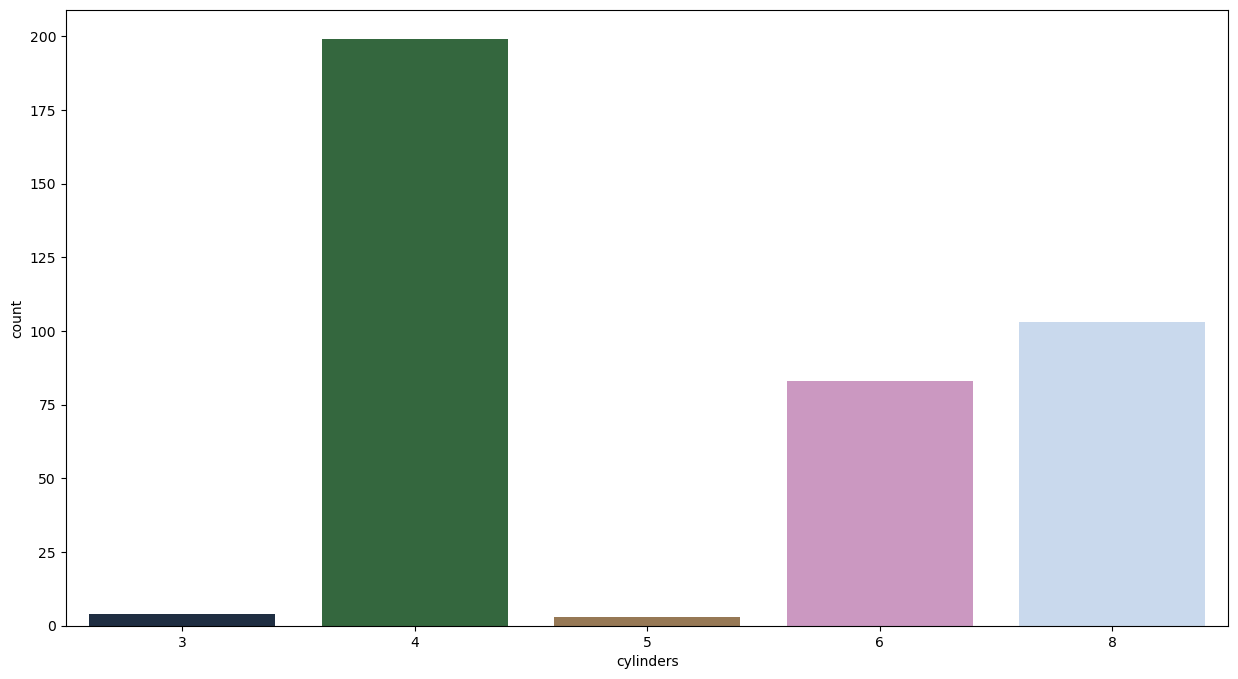

In [51]:
plt.figure(figsize = (15, 8))
sns.countplot(x = "cylinders", data = df, palette = "cubehelix")
plt.show()

In [52]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,usa
1,15.0,8,350.0,165.0,3693,11.5,70,usa
2,18.0,8,318.0,150.0,3436,11.0,70,usa
3,16.0,8,304.0,150.0,3433,12.0,70,usa
4,17.0,8,302.0,140.0,3449,10.5,70,usa
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa
394,44.0,4,97.0,52.0,2130,24.6,82,europe
395,32.0,4,135.0,84.0,2295,11.6,82,usa
396,28.0,4,120.0,79.0,2625,18.6,82,usa


In [53]:
# Adding 1900 to the year column so that it makes sense:

In [54]:
df["model_year"] = (1900 + df.model_year)

In [55]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504,12.0,1970,usa
1,15.0,8,350.0,165.0,3693,11.5,1970,usa
2,18.0,8,318.0,150.0,3436,11.0,1970,usa
3,16.0,8,304.0,150.0,3433,12.0,1970,usa
4,17.0,8,302.0,140.0,3449,10.5,1970,usa
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,1982,usa
394,44.0,4,97.0,52.0,2130,24.6,1982,europe
395,32.0,4,135.0,84.0,2295,11.6,1982,usa
396,28.0,4,120.0,79.0,2625,18.6,1982,usa


#### Examining the years and car production

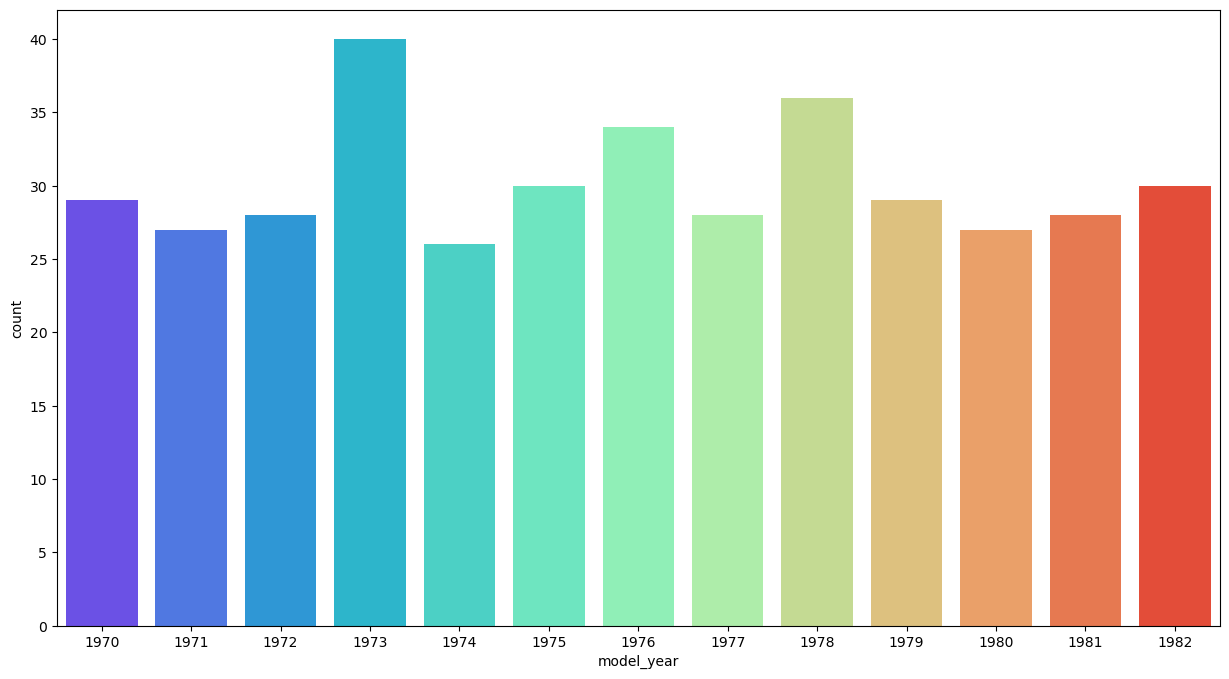

In [56]:
plt.figure(figsize = (15, 8))
sns.countplot(x = "model_year", data = df, palette = "rainbow")
plt.show()

#### Examinng the origin 

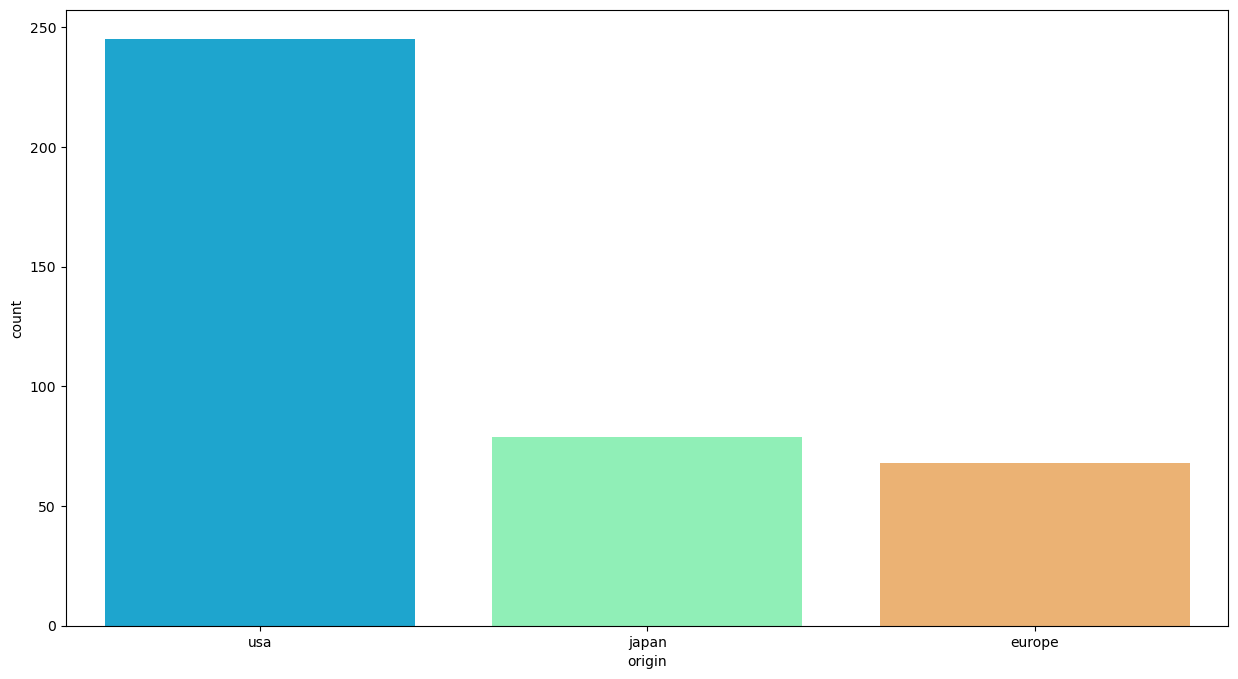

In [57]:
plt.figure(figsize = (15, 8))
sns.countplot(x = "origin", data = df, palette = "rainbow")
plt.show()

#### Examinig Skewness of the Horsepower

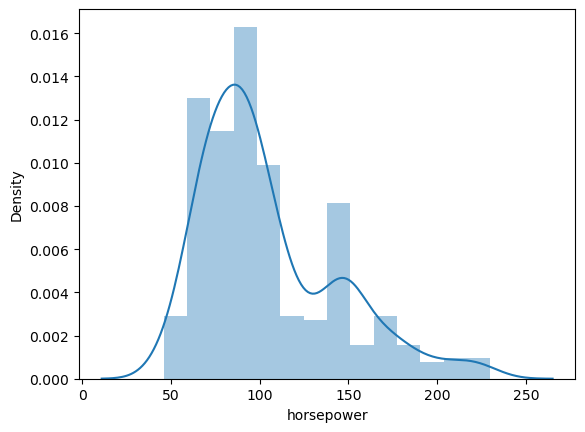

In [58]:
sns.distplot(df["horsepower"])
plt.show()

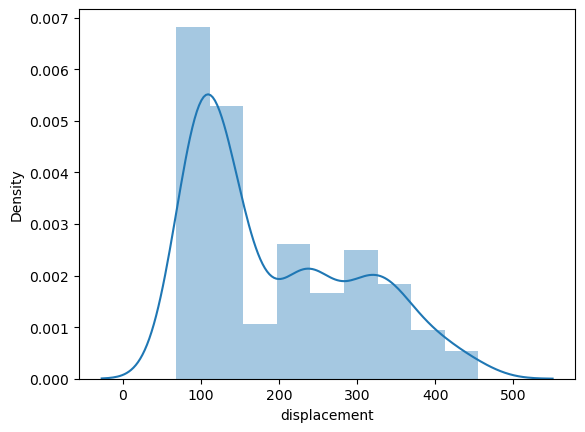

In [59]:
sns.distplot(df["displacement"])
plt.show()

## Bivariate Analysis

#### Examinig the relationship between cylinders and mpg

<Axes: xlabel='cylinders', ylabel='mpg'>

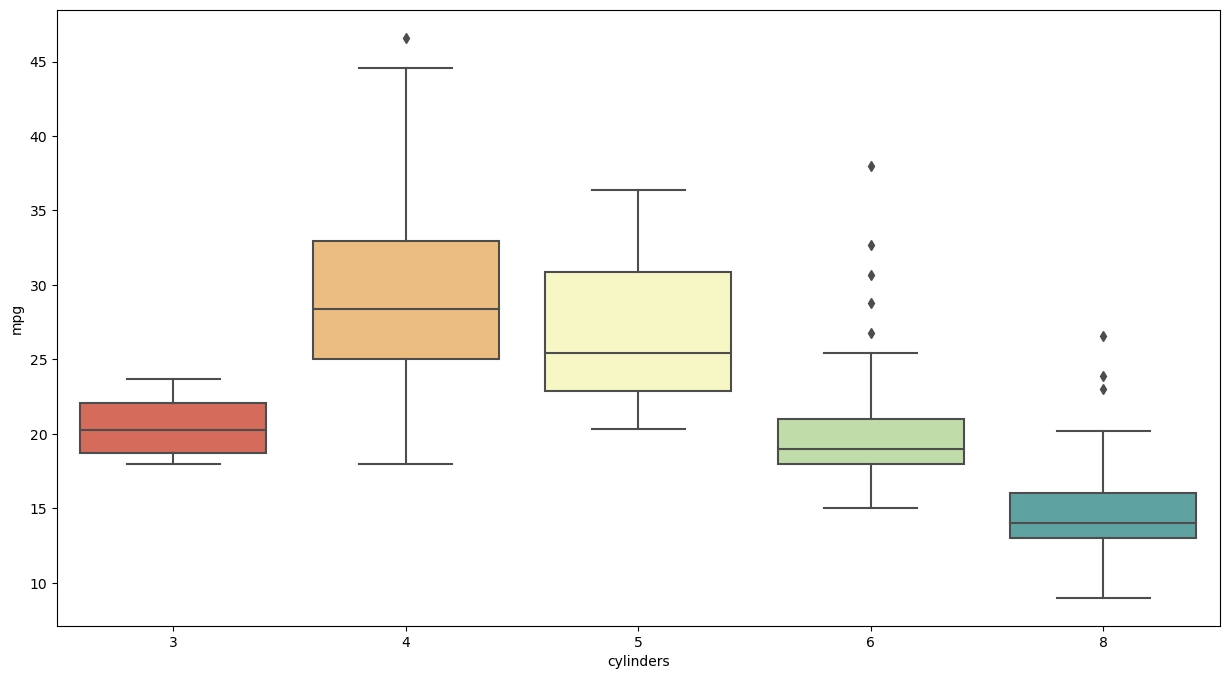

In [60]:
plt.figure(figsize = (15, 8))
sns.boxplot(x = "cylinders", y = "mpg", data = df, palette = "Spectral" )

#### Examinig the relationship between model_year and mpg

<Axes: xlabel='model_year', ylabel='mpg'>

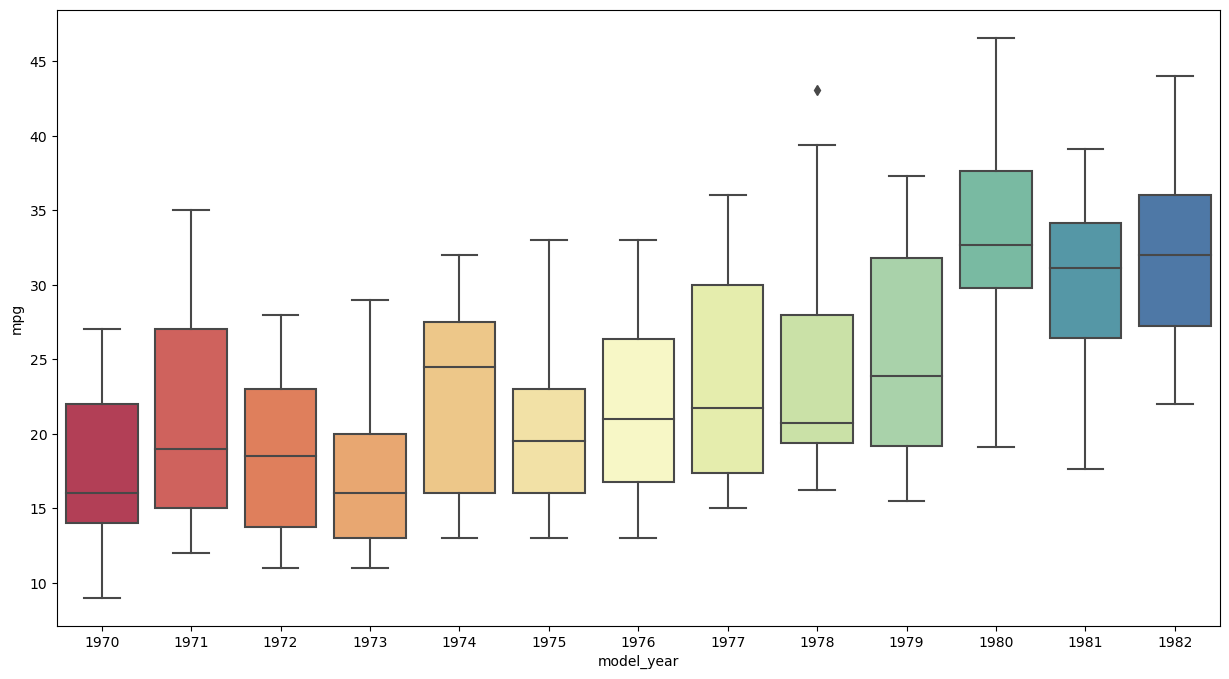

In [61]:
plt.figure(figsize = (15, 8))
sns.boxplot(x = "model_year", y = "mpg", data = df, palette = "Spectral" )

## Multivariate

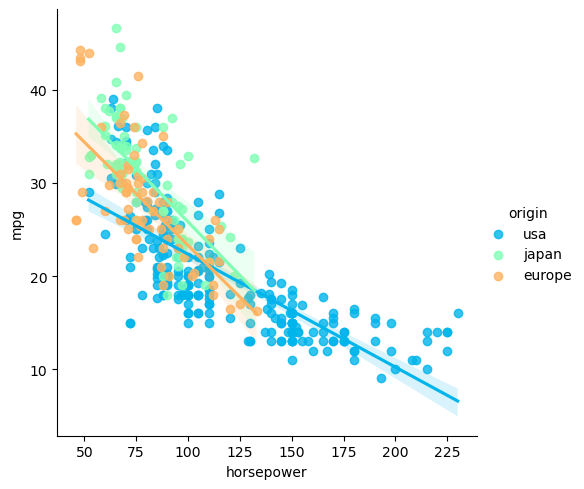

In [62]:
sns.lmplot(x = "horsepower", y = "mpg", hue = "origin", data = df, palette = "rainbow")
plt.show()

#### Examining the relationship between acceleration and mpg

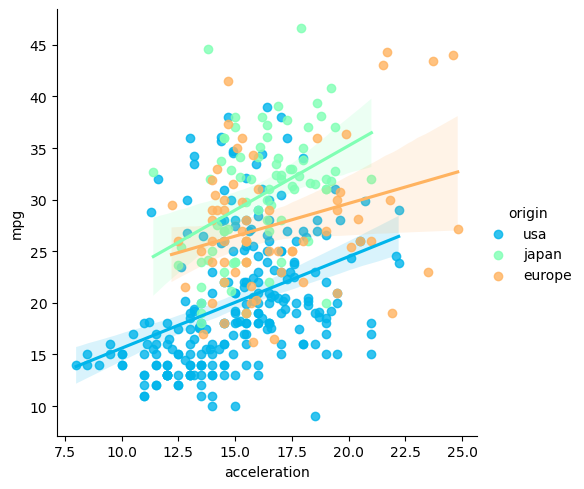

In [63]:
sns.lmplot(x = "acceleration", y = "mpg", hue = "origin", data = df, palette = "rainbow")
plt.show()

#### Examining the relationship between acceleration and mpg

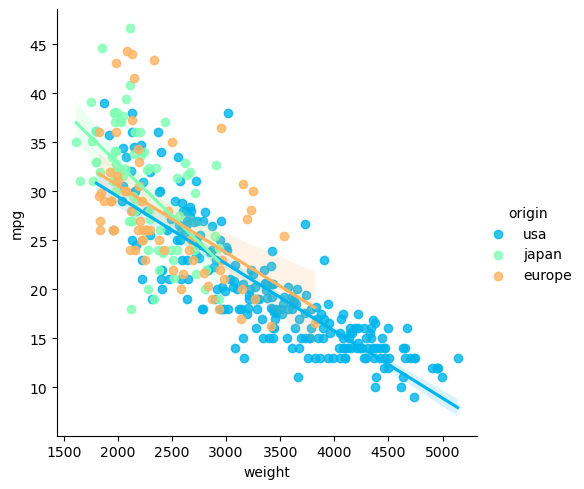

In [64]:
sns.lmplot(x = "weight", y = "mpg", hue = "origin", data = df, palette = "rainbow")
plt.show()

#### Examining the relationship between displacement and mpg

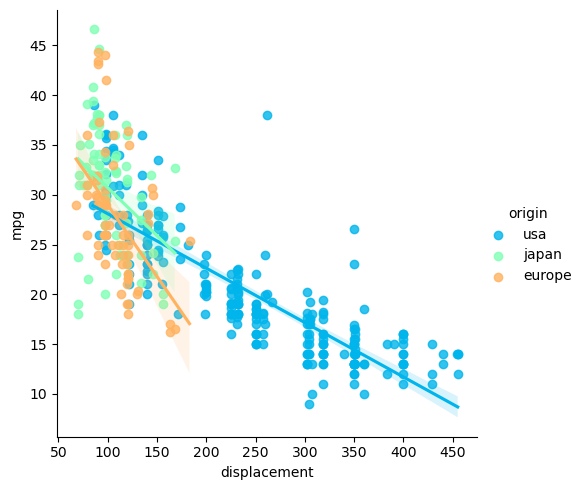

In [65]:
sns.lmplot(x = "displacement", y = "mpg", hue = "origin", data = df, palette = "rainbow")
plt.show()

In [66]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504,12.0,1970,usa
1,15.0,8,350.0,165.0,3693,11.5,1970,usa
2,18.0,8,318.0,150.0,3436,11.0,1970,usa
3,16.0,8,304.0,150.0,3433,12.0,1970,usa
4,17.0,8,302.0,140.0,3449,10.5,1970,usa
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,1982,usa
394,44.0,4,97.0,52.0,2130,24.6,1982,europe
395,32.0,4,135.0,84.0,2295,11.6,1982,usa
396,28.0,4,120.0,79.0,2625,18.6,1982,usa


In [67]:
df.drop(["origin"], axis = 1, inplace = False)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
0,18.0,8,307.0,130.0,3504,12.0,1970
1,15.0,8,350.0,165.0,3693,11.5,1970
2,18.0,8,318.0,150.0,3436,11.0,1970
3,16.0,8,304.0,150.0,3433,12.0,1970
4,17.0,8,302.0,140.0,3449,10.5,1970
...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,1982
394,44.0,4,97.0,52.0,2130,24.6,1982
395,32.0,4,135.0,84.0,2295,11.6,1982
396,28.0,4,120.0,79.0,2625,18.6,1982


In [68]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504,12.0,1970,usa
1,15.0,8,350.0,165.0,3693,11.5,1970,usa
2,18.0,8,318.0,150.0,3436,11.0,1970,usa
3,16.0,8,304.0,150.0,3433,12.0,1970,usa
4,17.0,8,302.0,140.0,3449,10.5,1970,usa
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,1982,usa
394,44.0,4,97.0,52.0,2130,24.6,1982,europe
395,32.0,4,135.0,84.0,2295,11.6,1982,usa
396,28.0,4,120.0,79.0,2625,18.6,1982,usa


## Heatmap correlation matrix

In [69]:
plt.figure(figsize = (15, 9))
sns.heatmap(df.corr(), annot= True, linewidth = 0.5, cmap = "Spectral")
plt.show()

ValueError: could not convert string to float: 'usa'

<Figure size 1500x900 with 0 Axes>

##### Dropping Acceleration and Displacement

In [70]:
df.drop(["acceleration", "displacement"], axis =1, inplace = True)

In [71]:
df.head()

,mpg,cylinders,horsepower,weight,model_year,origin
0,18.0,8,130.0,3504,1970,usa
1,15.0,8,165.0,3693,1970,usa
2,18.0,8,150.0,3436,1970,usa
3,16.0,8,150.0,3433,1970,usa
4,17.0,8,140.0,3449,1970,usa


In [72]:
from datetime import datetime

In [73]:
today = datetime.today()

In [74]:
today

datetime.datetime(2024, 3, 12, 6, 38, 49, 543562)

In [75]:
this_year = today.year

In [76]:
this_year

2024

In [77]:
df["age"] = this_year - df.model_year

In [78]:
df.drop(["model_year"], axis = 1, inplace = True)

In [79]:
df.head()

,mpg,cylinders,horsepower,weight,origin,age
0,18.0,8,130.0,3504,usa,54
1,15.0,8,165.0,3693,usa,54
2,18.0,8,150.0,3436,usa,54
3,16.0,8,150.0,3433,usa,54
4,17.0,8,140.0,3449,usa,54


In [80]:
df.origin.unique()

array(['usa', 'japan', 'europe'], dtype=object)

#### Apply dummies to this categorical variable

In [82]:
df = pd.get_dummies(df, drop_first = True)

In [83]:
df.head()

,mpg,cylinders,horsepower,weight,age,origin_japan,origin_usa
0,18.0,8,130.0,3504,54,False,True
1,15.0,8,165.0,3693,54,False,True
2,18.0,8,150.0,3436,54,False,True
3,16.0,8,150.0,3433,54,False,True
4,17.0,8,140.0,3449,54,False,True


**Modelling**

In [89]:
X = df.drop(["mpg"], axis = 1)
y = df["mpg"]

In [90]:
from sklearn.model_selection import train_test_split

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [92]:
X_train

,cylinders,horsepower,weight,age,origin_japan,origin_usa
260,6,110.0,3620,46,False,True
184,4,92.0,2572,48,False,True
174,6,97.0,2984,49,False,True
64,8,150.0,4135,52,False,True
344,4,64.0,1875,43,False,True
...,...,...,...,...,...,...
72,8,150.0,3892,52,False,True
107,6,100.0,2789,51,False,True
272,4,85.0,2855,46,False,True
352,4,65.0,2380,43,False,True


In [94]:
y_test

79     26.0
276    21.6
248    36.1
56     26.0
393    27.0
       ... 
366    17.6
83     28.0
115    15.0
3      16.0
18     27.0
Name: mpg, Length: 79, dtype: float64

In [95]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)
lm.intercept_

79.80442103966982

In [96]:
coef_param = pd.DataFrame(lm.coef_, index = X.columns, columns = ["Coefficient"])
coef_param

,Coefficient
cylinders,0.203056
horsepower,-0.014143
weight,-0.005729
age,-0.779904
origin_japan,0.401853
origin_usa,-2.385047


- This means that a unit increase in each of the variables above creates a corresponding increse (**Coefficient**) in the mpg variable

In [98]:
y_pred = lm.predict(X_test)

In [100]:
my_dict = {"Actual" : y_test, "pred" : y_pred}
compare = pd.DataFrame(my_dict)

In [101]:
compare.sample(10)

,Actual,pred
249,19.9,22.334720
74,13.0,11.908848
117,29.0,29.452644
358,31.6,31.340354
165,20.0,20.819971
77,22.0,24.601463
73,13.0,13.173142
169,20.0,22.314063
102,26.0,29.019571
270,21.1,29.391116


In [102]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [107]:
def evaluation_metrics(actual, pred):
    MAE = mean_absolute_error(actual, pred)
    MSE = mean_squared_error(actual, pred)
    RMSE = np.sqrt(mean_squared_error(actual, pred))
    SCORE =  r2_score(actual, pred)
    
    return print("r2_score:", SCORE, "\n", "mae:", MAE, "\n", "mse:", MSE, "\n", "rmse:", RMSE)

In [108]:
evaluation_metrics(y_test, y_pred)

r2_score: 0.7798249880881912 
 mae: 2.518828157615087 
 mse: 11.237861022823031 
 rmse: 3.352291905968666


In [109]:
!pip install yellowbrick

  Obtaining dependency information for yellowbrick from https://files.pythonhosted.org/packages/06/35/c7d44bb541c06bc41b3239b27af79ea0ecc7dbb156ee1335576f99c58b91/yellowbrick-1.5-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/282.6 kB ? eta -:--:--
   - -------------------------------------- 10.2/282.6 kB ? eta -:--:--
   - -------------------------------------- 10.2/282.6 kB ? eta -:--:--
   ----- --------------------------------- 41.0/282.6 kB 245.8 kB/s eta 0:00:01
   --------- ----------------------------- 71.7/282.6 kB 393.8 kB/s eta 0:00:01
   ---------------- --------------------- 122.9/282.6 kB 554.9 kB/s eta 0:00:01
   --------------------------- ---------- 204.8/282.6 kB 731.4 kB/s eta 0:00:01
   -------------------------------------  276.5/282.6 kB 896.4 kB/s eta 0:00:01
   -------------------------------------- 282.6/282.6 kB 870.2 kB/s eta 0:00:00


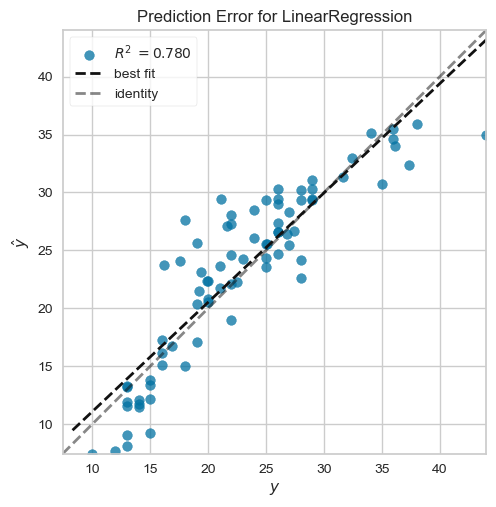

<Axes: title={'center': 'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [111]:
from yellowbrick.regressor import PredictionError


visualizer = PredictionError(lm)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)

visualizer.show()